# Import Packages 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from sklearn.preprocessing import StandardScaler
style.use('fivethirtyeight')
%matplotlib inline

# Data Collection

In [2]:
# Training Data
dengue_features_train = pd.read_csv('dengue_features_train.csv')
dengue_labels_train = pd.read_csv('dengue_labels_train.csv')

# Testing Dataset Features Only
dengue_features_test = pd.read_csv('dengue_features_test.csv')

In [3]:
dengue_features_train.shape

(1456, 24)

In [4]:
dengue_features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [5]:
dengue_features_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


# Data Preprocessing 

In [6]:
# Merge the labels and features of the training data into one data set
#dengue_train = pd.merge(dengue_features_train,dengue_labels_train.iloc[:,:3])

In [7]:
# Create a function to fill the missing values in each column with the mean in that column
def fillNulls(nullcols,df):
    for col in nullcols:
        df[col].fillna(value=df[col].mean(), inplace=True)

In [8]:
def extract_month(s):
    return int(s[5:7])

In [9]:
na_cols = ['ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']
numeric_cols = na_cols

In [10]:
def pre_process(X, train = True):
    """
    Extracts the month out of date and converts it to a one hot
    Standardizes the numerical features
    Converts the city column to a boolean feature
    """
    # Converting the city column into a boolean, since we just have two cities
    is_sj = X.city == 'sj'

    #Extracting month from the date
    months = X.week_start_date.apply(extract_month)

    # Removing the dates info for now
    X.drop(['city', 'year', 'weekofyear', 'week_start_date'], axis=1, inplace=True)
    
    if train:
        # Dropping the rows with null values for now
        X.dropna(inplace=True)
    else:
        X.fillna(0,inplace=True)

    # Standardizing the data
    scaler = StandardScaler()
    X[X.columns] = scaler.fit_transform(X)

    # Adding the city boolean column
    X['is_sj'] = is_sj.loc[X.index]

    sliced_months = months.loc[X.index]
    # Month one hot features
    month_features = pd.get_dummies(sliced_months)
    X = X.join(month_features)

    # Alternatively use months as a discrete feature
    #X = X.join(sliced_months)
    
    return X

In [11]:
#dengue_features_testNumeric = pre_process(dengue_features_test, train=False)

In [12]:
#dengue_features_testNumeric.head()

In [13]:
#months =dengue_train.week_start_date.apply(extract_month)

In [14]:
#sliced_months = months.loc[dengue_train.index]

In [15]:
#pd.get_dummies(sliced_months)

In [16]:
pre_process(dengue_features_train)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,3,4,5,6,7,8,9,10,11,12
0,-0.122207,-0.253846,-0.095140,-0.328502,-0.814598,-0.808198,-1.190146,-1.926304,-1.171085,0.122086,...,0,1,0,0,0,0,0,0,0,0
1,0.215513,0.064732,-0.580536,-0.587307,-0.573640,-0.340090,-0.634981,-0.901462,-0.837468,0.315202,...,0,0,1,0,0,0,0,0,0,0
2,-0.767304,0.319858,-0.649827,-0.407716,-0.302099,0.077752,-0.289418,0.087186,-0.958783,0.662810,...,0,0,1,0,0,0,0,0,0,0
3,-0.079130,0.917244,0.295500,0.352911,-0.746481,0.228552,-0.011835,0.004322,-0.685825,0.546941,...,0,0,1,0,0,0,0,0,0,0
4,0.403295,1.059203,0.613169,0.486861,-0.928126,0.618119,0.333727,0.345301,-0.534181,0.740057,...,0,0,1,0,0,0,0,0,0,0
6,-0.191465,-0.344365,-0.006621,0.053371,-1.021729,0.389825,-0.017500,0.374827,-0.716153,0.817303,...,0,0,0,1,0,0,0,0,0,0
7,-0.479920,-0.512562,-0.726797,-0.849927,2.398945,0.671527,0.226093,0.818671,-0.928455,1.087665,...,0,0,0,1,0,0,0,0,0,0
8,-0.266078,0.097875,-1.074793,-0.960187,-0.654732,0.662102,0.248753,0.716758,-0.473523,0.817303,...,0,0,0,1,0,0,0,0,0,0
10,0.379554,-0.430949,-0.183017,-0.617211,-0.586383,0.613930,0.277077,0.491979,-0.564510,0.933172,...,0,0,0,0,1,0,0,0,0,0
11,1.084448,0.641612,1.284975,0.876592,0.268554,0.727030,0.401706,0.687232,-0.503852,0.662810,...,0,0,0,0,1,0,0,0,0,0


In [17]:
pre_process(dengue_features_test, train=False)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,3,4,5,6,7,8,9,10,11,12
0,-0.824064,-1.010706,-1.313073,-1.191691,1.150400,0.053626,0.030661,0.025780,-0.050108,0.100691,...,0,1,0,0,0,0,0,0,0,0
1,-0.818442,-0.964555,-1.573061,-1.396223,-0.728707,0.052798,0.031005,0.019366,-0.064241,0.115226,...,0,0,1,0,0,0,0,0,0,0
2,-0.715372,-0.876513,-0.705330,-1.188132,-0.981948,0.100093,0.069564,0.063916,0.001710,0.100691,...,0,0,1,0,0,0,0,0,0,0
3,-0.706002,-1.017569,-1.041595,-0.818210,-1.086090,0.111399,0.087467,0.019715,0.039396,0.124915,...,0,0,1,0,0,0,0,0,0,0
4,-0.351191,-0.593691,-1.821617,-1.357235,-1.064465,0.115743,0.084712,0.037144,0.006421,0.144294,...,0,0,1,0,0,0,0,0,0,0
5,-0.980855,-1.092831,-0.945177,-1.274773,0.938986,0.115191,0.087467,0.064195,-0.012422,0.158828,...,0,0,0,1,0,0,0,0,0,0
6,-0.982729,-1.053484,-0.941766,-0.455715,0.307875,0.129393,0.100894,0.080579,0.011131,0.153984,...,0,0,0,1,0,0,0,0,0,0
7,-0.706002,-0.293236,-0.789688,-0.915216,-0.209420,0.149731,0.128436,0.097520,0.062950,0.153984,...,0,0,0,1,0,0,0,0,0,0
8,-0.638538,-0.522216,-1.340186,-0.908718,-0.857888,0.155384,0.130502,0.110767,0.015842,0.202431,...,0,0,0,1,0,0,0,0,0,0
9,-0.252077,-0.119212,-0.650716,-0.393519,-0.587575,0.150352,0.126026,0.117739,0.006421,0.212121,...,0,0,0,0,1,0,0,0,0,0


In [21]:
dengue_features_test.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,is_sj
0,-0.824064,-1.010706,-1.313073,-1.191691,1.150400,0.053626,0.030661,0.025780,-0.050108,0.100691,...,-0.356928,1.150400,-0.476845,-0.555653,-0.010869,-0.192700,0.298395,-0.050215,1.194355,True
1,-0.818442,-0.964555,-1.573061,-1.396223,-0.728707,0.052798,0.031005,0.019366,-0.064241,0.115226,...,-0.416180,-0.728707,-0.542237,-0.712691,-0.107336,-0.739593,-0.686308,0.085784,0.012524,True
2,-0.715372,-0.876513,-0.705330,-1.188132,-0.981948,0.100093,0.069564,0.063916,0.001710,0.100691,...,-0.411882,-0.981948,-0.088166,-0.189231,0.284559,0.072934,0.149197,0.248984,-0.891909,True
3,-0.706002,-1.017569,-1.041595,-0.818210,-1.086090,0.111399,0.087467,0.019715,0.039396,0.124915,...,-0.976465,-1.086090,-0.550319,-0.213391,0.311690,-0.479168,0.298395,0.684182,-0.969927,True
4,-0.351191,-0.593691,-1.821617,-1.357235,-1.064465,0.115743,0.084712,0.037144,0.006421,0.144294,...,-0.861645,-1.064465,-0.364429,-0.438881,0.218238,-0.182283,0.298395,0.384983,1.451526,True


In [22]:
dengue_features_train.isnull().sum()

ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
is_sj                                    0
dtype: int64

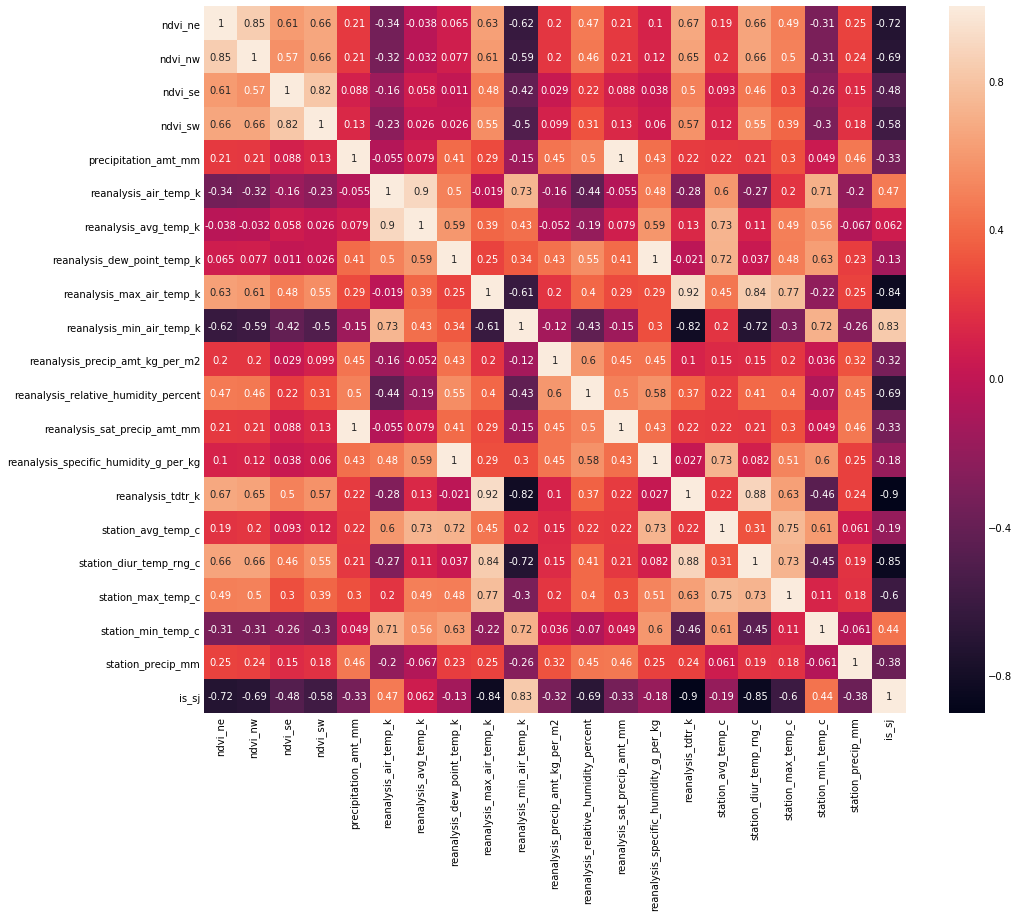

In [23]:
# Check correlations between variables 
plt.figure(figsize=(14,13))
sns.heatmap(dengue_features_train.corr(), annot=True)

## Linear Regression

In [24]:
X = dengue_features_train

y = dengue_labels_train.total_cases.loc[X.index]

In [25]:
print(dengue_features_test.shape, dengue_features_train.shape)

(416, 21) (1199, 21)


### Train test split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, shuffle = False)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
predictions = lm.predict(X_test)

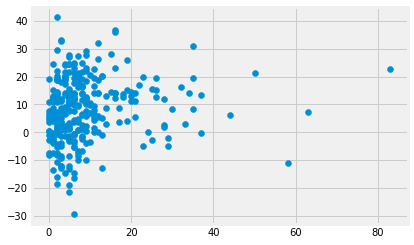

In [30]:
plt.scatter(y_test,predictions)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


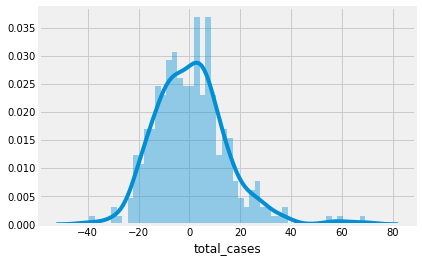

In [31]:
sns.distplot((y_test-predictions),bins=50);

### Model Evaluation 

In [32]:
from sklearn import metrics

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))

MAE: 10.873948479311917


### Predict with Real Dataset

In [34]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
predictions_real = lm.predict(dengue_features_test)
predictions_real.shape

(416,)

In [36]:
# Testing Dataset Features Only
dengue_features_test = pd.read_csv('dengue_features_test.csv')

In [37]:
# Concatenate city, year, weekofyear, total_cases on the column axis 
submission1 = pd.concat([dengue_features_test['city'],dengue_features_test['year'], dengue_features_test['weekofyear'], pd.Series(predictions_real.round())],axis=1)

# Set the city column as the index
submission1.set_index('city',inplace=True)

# Rename columns
submission1.columns = ['year', 'weekofyear', 'total_cases']

# convert type of 'total_cases' column to integer
submission1['total_cases'] = submission1['total_cases'].astype('int64')

In [38]:
submission1.head()

,year,weekofyear,total_cases
city,,,
sj,2008,18,6
sj,2008,19,5
sj,2008,20,26
sj,2008,21,0
sj,2008,22,12


In [39]:
# Convert to CSV for submission
submission1.to_csv('submission4.csv')

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
est = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1,
max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)
metrics.mean_absolute_error(y_test, predictions)  

# References 
* [https://www.datacamp.com/community/tutorials/categorical-data] - Handling Categorical data for ML

* https://machinelearningmastery.com/feature-selection-machine-learning-python - feature Selection from ML Mastery

* [https://scikit-learn.org/stable/modules/feature_selection.html] - Feature Selection SKLearn documentation.

In [ ]:
from sklearn.feature_selection import RFE
# load data
names = ['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases']
dataframe = dengue_train[names]
array = dataframe.values
X = array[:,0:23]
Y = array[:,23]
# feature extraction
model = LinearRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


In [ ]:
imp_features = ['ndvi_se', 'ndvi_sw','reanalysis_air_temp_k','reanalysis_dew_point_temp_k',
 'reanalysis_avg_temp_k','station_min_temp_c','reanalysis_tdtr_k']

In [ ]:
X_new = dengue_train[imp_features]

y_new = dengue_train['total_cases']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.4, random_state=101)

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)



In [ ]:
sns.distplot((y_test-predictions),bins=50);


In [ ]:
### Model Evaluation 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))



In [ ]:
### Predict with Real Dataset

predictions_real = lm.predict(dengue_features_testNumeric[imp_features])

# Concatenate city, year, weekofyear, total_cases on the column axis 
submission2 = pd.concat([dengue_features_test['city'],dengue_features_test['year'], dengue_features_test['weekofyear'], pd.Series(predictions_real.round())],axis=1)

# Set the city column as the index
submission2.set_index('city',inplace=True)

# Rename columns
submission2.columns = ['year', 'weekofyear', 'total_cases']

# convert type of 'total_cases' column to integer
submission2['total_cases'] = submission1['total_cases'].astype('int64')

In [ ]:
# Convert to CSV for submission
submission2.to_csv('submission2.csv')